## Observations and Insights

The groups of mice treated with Ramicane and Capomulin were the only ones that showed a decrease in the Tumor Volume during the time of the experiment.

The groups of mice treated with Ramicane and Capomulin had the lowest average metastatic count during the time of the experiment.

The groups with the highest survival rates where the groups treated with Ramicane and Copomulin.

A positive correlation between Tumor Volume and Weight was observed.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress, sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset


studyRaw_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Make sure all the rows match.
studyRaw_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [2]:
# How many mice
len(studyRaw_df["Mouse ID"].unique())

249

In [3]:
# Make sure the DataFrame has no NaN values.
studyRaw_df.isnull().values.any()

False

In [4]:
# Check the type of data in the columns
studyRaw_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
# Check for duplicates in the data
duplicates = studyRaw_df.loc[
    studyRaw_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"
].unique()

duplicates

array(['g989'], dtype=object)

In [6]:
# Visualize the duplicates in the DataFrame to make sure they are duplicates.
studyRaw_df[studyRaw_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Tumor volume is not duplicated but the rest of the data is bad.
# using .isin() we can filter only the values that are not equal to the values under the duplicates DataFrame
study_df = studyRaw_df[studyRaw_df["Mouse ID"].isin(duplicates) == False]

study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summaryStats_df = study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
)

summaryStats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

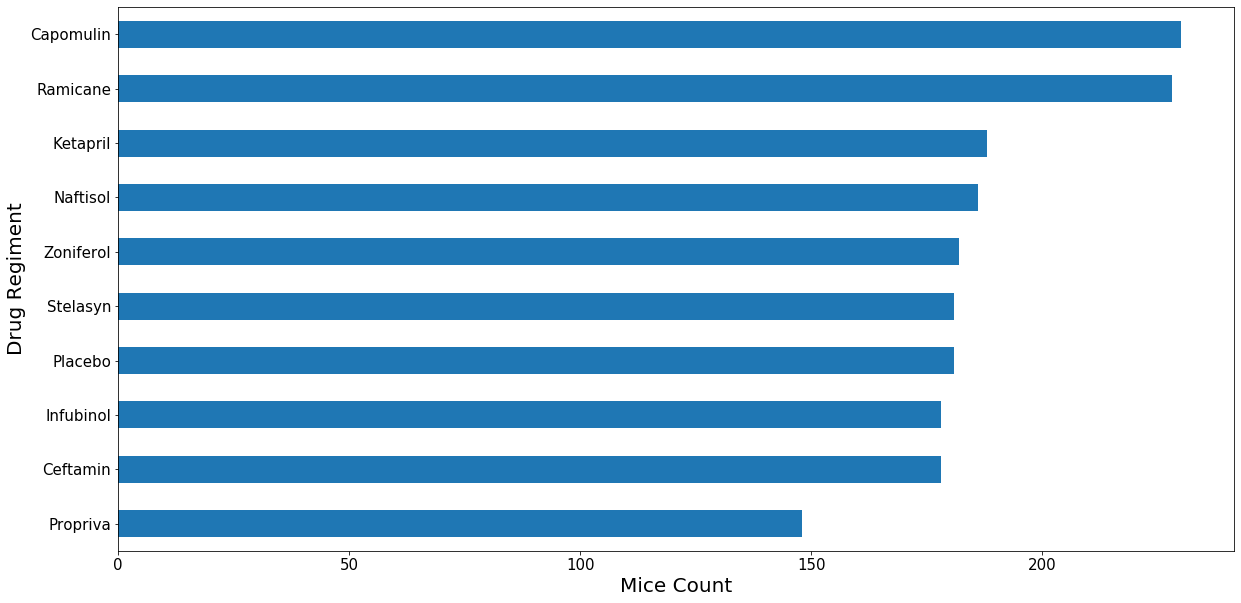

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

barplot_df = study_df["Drug Regimen"].value_counts().sort_values()

y_axis = barplot_df.values
x_axis = barplot_df.index

barplot_df.plot(kind="barh", legend=False, figsize=(20, 10), fontsize=15, width=0.5)

plt.ylabel("Drug Regiment", fontsize=20)
plt.xlabel("Mice Count", fontsize=20)

plt.show()

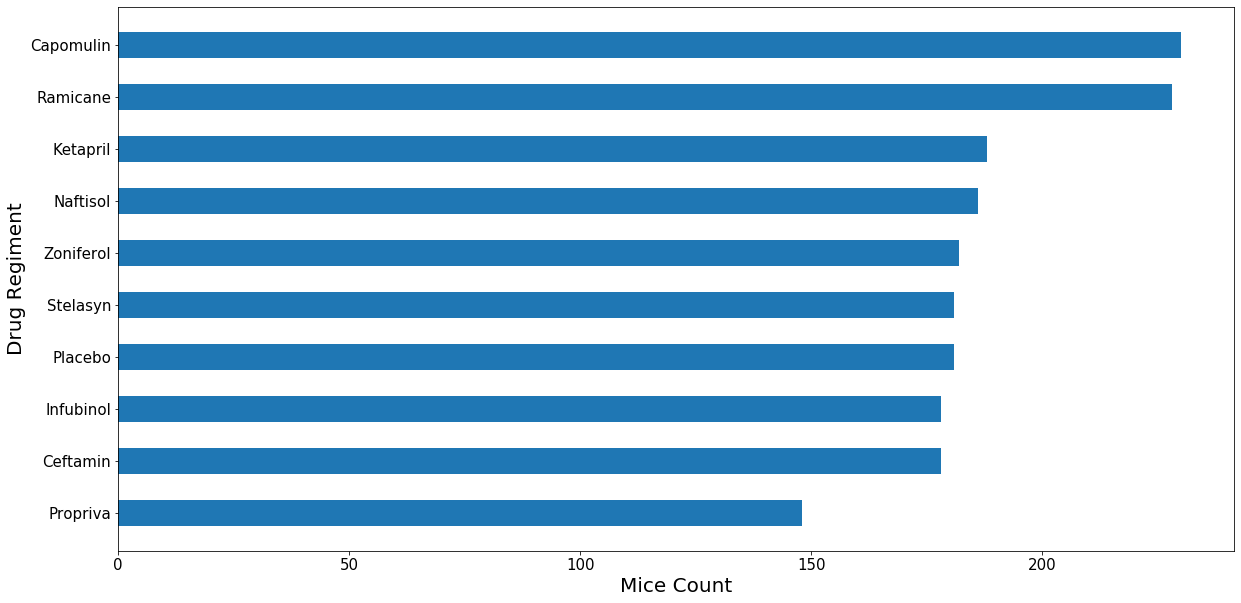

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.figure(figsize=(20, 10))

y_axis = list(barplot_df.values)
x_axis = list(barplot_df.index)

barWidth = 0.5

plt.barh(x_axis, y_axis, barWidth)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel("Drug Regiment", fontsize=20)
plt.xlabel("Mice Count", fontsize=20)

plt.show()

## Pie plots

In [11]:
summaryPie_df = pd.DataFrame(
    {"Sex": study_df["Sex"].value_counts()}, index=study_df["Sex"].value_counts().index
)

summaryPie_df

,Sex
Male,958
Female,922


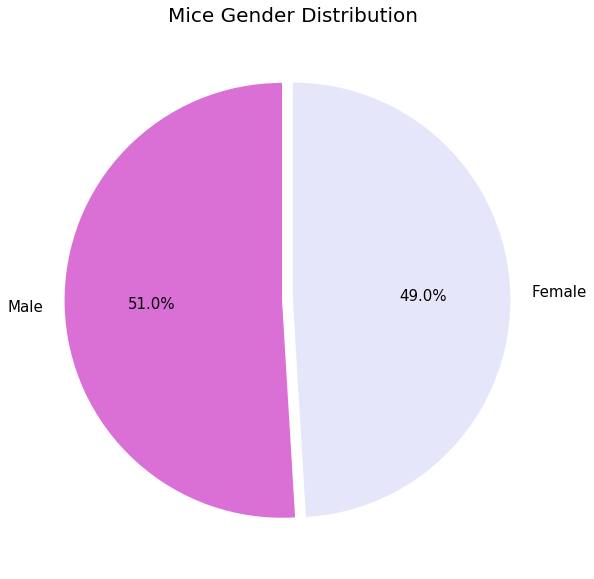

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["orchid", "lavender"]

summaryPie_df.plot(
    y="Sex",
    kind="pie",
    figsize=(20, 10),
    fontsize=15,
    autopct="%1.1f%%",
    legend=False,
    colors=colors,
    explode=[0.05, 0],
    startangle=90,
    label="",
)

plt.title("Mice Gender Distribution", fontsize=20)
plt.show()

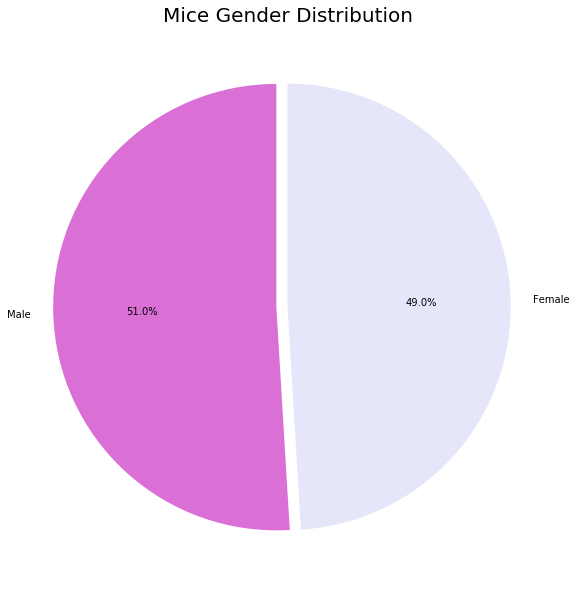

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(10, 10))

plt.subplots_adjust(top=1)

plt.pie(
    summaryPie_df["Sex"],
    labels=summaryPie_df.index,
    colors=colors,
    autopct="%1.1f%%",
    explode=[0.05, 0],
    startangle=90,
)

plt.rcParams["font.size"] = 15

plt.title("Mice Gender Distribution", fontsize=20)

plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Create pivot table to see the evolution of the tumors over time
# Default of pivot for values is np.mean.
meanTummorVolume_df = study_df.pivot_table(
    values="Tumor Volume (mm3)", index="Timepoint", columns="Drug Regimen"
)

# Sort the columns in ascending order based on the index 45.
meanTummorVolume_df = meanTummorVolume_df.sort_values(by=45, axis=1)

meanTummorVolume_df

Drug Regimen,Ramicane,Capomulin,Ceftamin,Infubinol,Zoniferol,Propriva,Placebo,Stelasyn,Naftisol,Ketapril
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,43.944859,44.266086,46.503051,46.541247,46.851818,47.168130,47.125589,47.470830,46.796098,47.389175
10,42.531957,43.084291,48.285125,49.403909,48.689881,48.938560,49.423329,49.335368,48.694210,49.582269
15,41.495061,42.064317,50.094055,51.296397,50.779059,50.891769,51.359742,51.448025,50.933018,52.399974
20,40.238325,40.716325,52.157049,53.197691,53.170334,53.127384,54.364417,53.970080,53.644087,54.920935
25,38.974300,39.939528,54.287674,55.715252,55.432935,55.462490,57.482574,56.172821,56.731968,57.678982
30,38.703137,38.769339,56.769517,58.299397,57.713531,58.122548,59.809063,59.870528,59.559509,60.994507
35,37.451996,37.816839,58.827548,60.742461,60.089372,60.103457,62.420615,62.432021,62.685087,63.371686
40,36.574081,36.958001,61.467895,63.162824,62.916692,63.045537,65.052675,65.356386,65.600754,66.068580


In [15]:
# pick the top 4 drugs
meanTummorVolumeTop4_df = meanTummorVolume_df[
    ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]
]

meanTummorVolumeTop4_df

Drug Regimen,Ramicane,Capomulin,Ceftamin,Infubinol
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,43.944859,44.266086,46.503051,46.541247
10,42.531957,43.084291,48.285125,49.403909
15,41.495061,42.064317,50.094055,51.296397
20,40.238325,40.716325,52.157049,53.197691
25,38.974300,39.939528,54.287674,55.715252
30,38.703137,38.769339,56.769517,58.299397
35,37.451996,37.816839,58.827548,60.742461
40,36.574081,36.958001,61.467895,63.162824


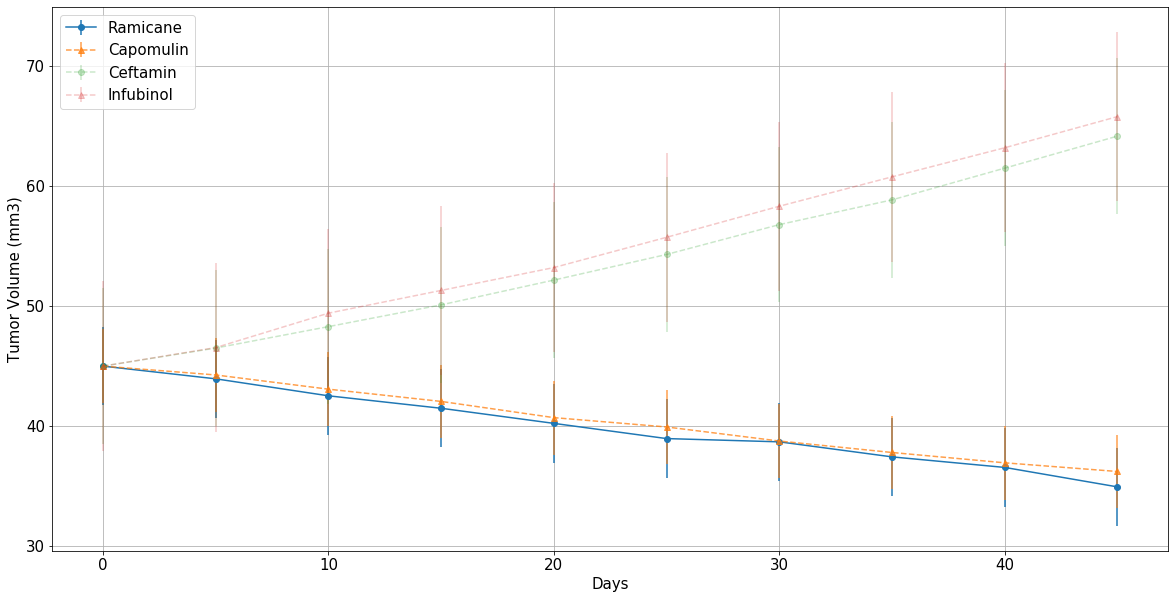

In [16]:
# top 4 tummor volume vs day
plt.figure(figsize=(20, 10))

plt.errorbar(
    meanTummorVolumeTop4_df.index,
    meanTummorVolumeTop4_df["Ramicane"],
    yerr=meanTummorVolumeTop4_df["Ramicane"].std(),
    linestyle="solid",
    fmt="o",
    label="Ramicane",
)

plt.errorbar(
    meanTummorVolumeTop4_df.index,
    meanTummorVolumeTop4_df["Capomulin"],
    yerr=meanTummorVolumeTop4_df["Capomulin"].std(),
    linestyle="--",
    fmt="^",
    label="Capomulin",
    alpha=0.75,
)
plt.errorbar(
    meanTummorVolumeTop4_df.index,
    meanTummorVolumeTop4_df["Ceftamin"],
    yerr=meanTummorVolumeTop4_df["Ceftamin"].std(),
    linestyle="--",
    fmt="o",
    label="Ceftamin",
    alpha=0.25,
)
plt.errorbar(
    meanTummorVolumeTop4_df.index,
    meanTummorVolumeTop4_df["Infubinol"],
    yerr=meanTummorVolumeTop4_df["Infubinol"].std(),
    linestyle="--",
    fmt="^",
    label="Infubinol",
    alpha=0.25,
)

plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="upper left")
plt.grid()

plt.show()

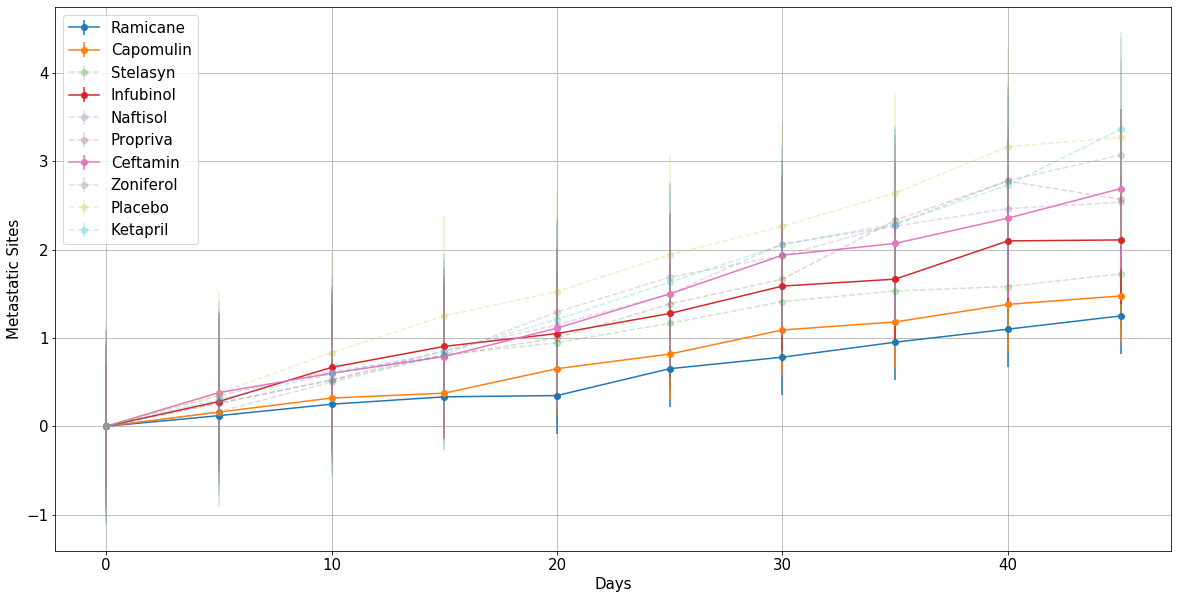

In [17]:
# Metastic Sites bs time

meanMetastic_df = study_df.pivot_table(
    values="Metastatic Sites", index="Timepoint", columns="Drug Regimen"
)

meanMetastic_df = meanMetastic_df.sort_values(by=45, axis=1)

plt.figure(figsize=(20, 10))
for i in meanMetastic_df.columns:
    if i in ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]:
        alphaValue = 1
        linStyle = "solid"
    else:
        alphaValue = 0.25
        linStyle = "--"

    plt.errorbar(
        meanMetastic_df.index,
        meanMetastic_df[i],
        yerr=meanMetastic_df[i].std(),
        linestyle=linStyle,
        fmt="o",
        label=f"{i}",
        alpha=alphaValue,
    )

plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.show()

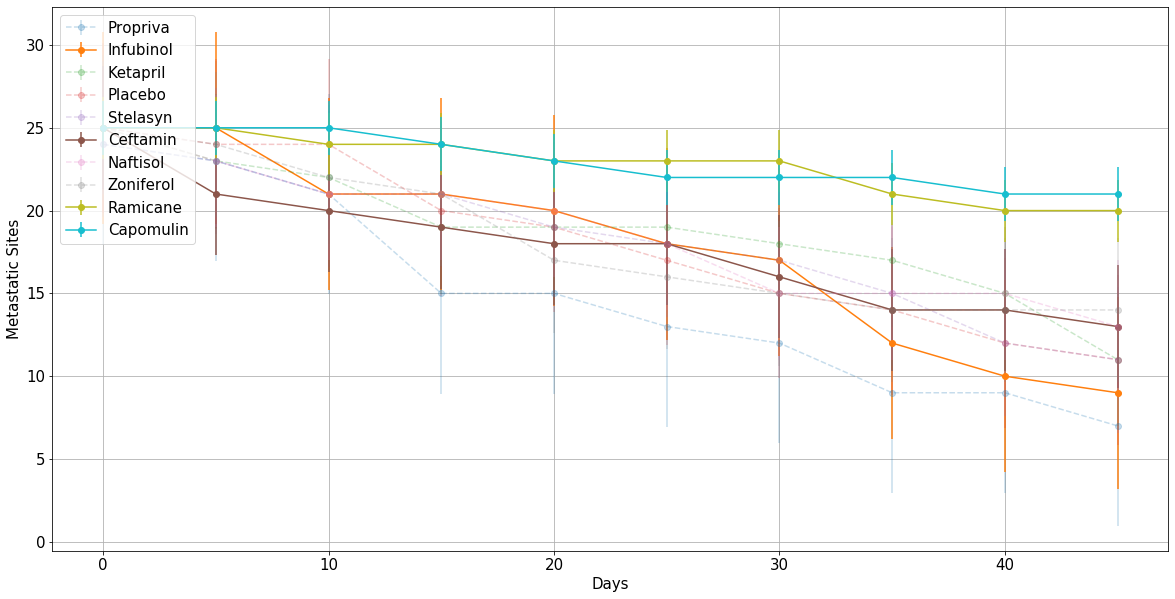

In [18]:
# Survival Rates

meanMetastic_df = study_df.pivot_table(
    values="Mouse ID", index="Timepoint", columns="Drug Regimen", aggfunc="count"
)

meanMetastic_df = meanMetastic_df.sort_values(by=45, axis=1)

plt.figure(figsize=(20, 10))
for i in meanMetastic_df.columns:
    if i in ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]:
        alphaValue = 1
        linStyle = "solid"
    else:
        alphaValue = 0.25
        linStyle = "--"

    plt.errorbar(
        meanMetastic_df.index,
        meanMetastic_df[i],
        yerr=meanMetastic_df[i].std(),
        linestyle=linStyle,
        fmt="o",
        label=f"{i}",
        alpha=alphaValue,
    )

plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.show()

In [20]:
# New DataFrame with only the top 4 regiments.

studyTop4Regiments_df = study_df[
    study_df["Drug Regimen"].isin(meanTummorVolumeTop4_df.columns.tolist()) == True
]

studyTop4Regiments_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
miceFinalTumorVolume_df = studyTop4Regiments_df.groupby("Mouse ID").last()

miceFinalTumorVolume_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Statistical summary

miceFinalTumorVolumeStats_df = miceFinalTumorVolume_df.groupby("Drug Regimen")[
    "Tumor Volume (mm3)"
].agg(["mean", "median", "var", "std", "sem"])

miceFinalTumorVolumeStats_df = miceFinalTumorVolumeStats_df.sort_values("mean")


def IQR(row):
    return row[7] - row[5]


def Lbound(row):
    return row[5] - (row[8] * 1.5)


def Ubound(row):
    return row[7] + (row[8] * 1.5)


# Add the quantiles to the existing summary statistics table
miceFinalTumorVolumeStats_df["25th"] = miceFinalTumorVolume_df.groupby("Drug Regimen")[
    "Tumor Volume (mm3)"
].quantile(q=0.25)
miceFinalTumorVolumeStats_df["50th"] = miceFinalTumorVolume_df.groupby("Drug Regimen")[
    "Tumor Volume (mm3)"
].quantile(q=0.5)
miceFinalTumorVolumeStats_df["75th"] = miceFinalTumorVolume_df.groupby("Drug Regimen")[
    "Tumor Volume (mm3)"
].quantile(q=0.75)

miceFinalTumorVolumeStats_df["IQR"] = miceFinalTumorVolumeStats_df.apply(IQR, axis=1)
miceFinalTumorVolumeStats_df["Lower Bound"] = miceFinalTumorVolumeStats_df.apply(
    Lbound, axis=1
)
miceFinalTumorVolumeStats_df["Upper Bound"] = miceFinalTumorVolumeStats_df.apply(
    Ubound, axis=1
)

miceFinalTumorVolumeStats_df

,mean,median,var,std,sem,25th,50th,75th,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,,,,,,
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446


In [23]:
outliers = []

for i in ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]:
    drug_df = miceFinalTumorVolume_df[miceFinalTumorVolume_df["Drug Regimen"] == i]
    for j in range(len(drug_df)):
        if drug_df.iloc[j, 5] > miceFinalTumorVolumeStats_df.loc[i, "Upper Bound"]:
            outliers.append(drug_df.index.tolist()[j])

        elif drug_df.iloc[j, 5] < miceFinalTumorVolumeStats_df.loc[i, "Lower Bound"]:
            outliers.append(drug_df.index.tolist()[j])
outliers

outliers_df = (
    studyTop4Regiments_df[studyTop4Regiments_df["Mouse ID"].isin(outliers) == True]
    .groupby("Mouse ID")
    .last()
)

# Outliers DataFrame
outliers_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
c326,Infubinol,Female,18,25,5,36.321346,0


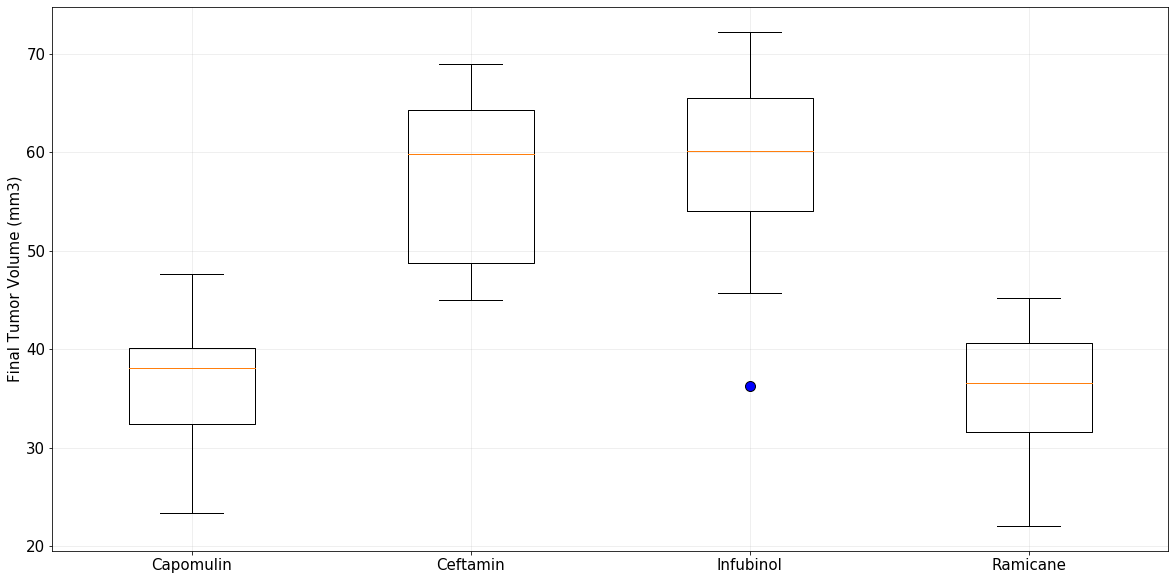

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(20, 10))

dataPlot = miceFinalTumorVolume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(
    list
)

labels = dataPlot.index.tolist()

plt.boxplot(
    dataPlot, labels=labels, flierprops={"markersize": 10, "markerfacecolor": "blue"}
)
plt.grid(alpha=0.25)

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and scatter plots

In [24]:
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


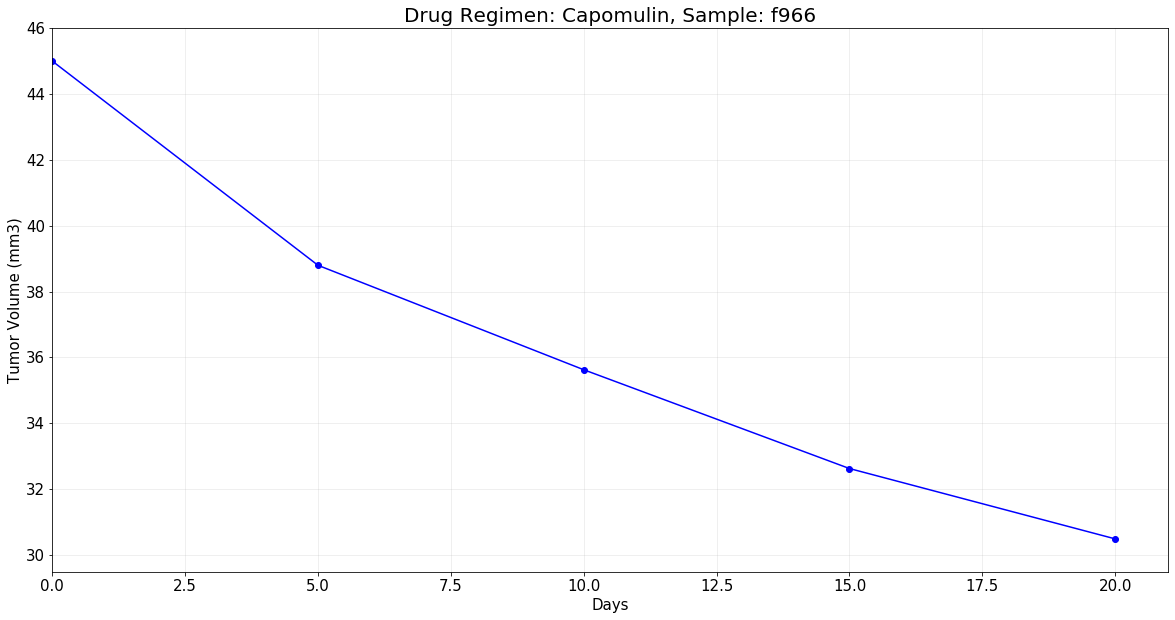

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

drugRegiment = "Capomulin"

drug_df = study_df.loc[study_df["Drug Regimen"] == drugRegiment]
mouseId = random.choice(drug_df["Mouse ID"].unique().tolist())

mouse_df = study_df.loc[study_df["Mouse ID"] == mouseId]

plt.figure(figsize=(20, 10))

plt.plot(
    mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker="o", color="blue"
)

plt.title(f"Drug Regimen: {drugRegiment}, Sample: {mouseId}", fontsize=20)

plt.ylabel("Tumor Volume (mm3)", fontsize=15)
plt.xlabel("Days", fontsize=15)

plt.ylim(
    mouse_df["Tumor Volume (mm3)"].min() - 1, mouse_df["Tumor Volume (mm3)"].max() + 1
)
plt.xlim(0, mouse_df["Timepoint"].max() + 1)

plt.grid(alpha=0.25)

plt.show()

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

combinedMice_df = study_df.loc[study_df["Drug Regimen"] == drugRegiment]

combinedMice_df = combinedMice_df.groupby("Mouse ID").mean()

combinedMice_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


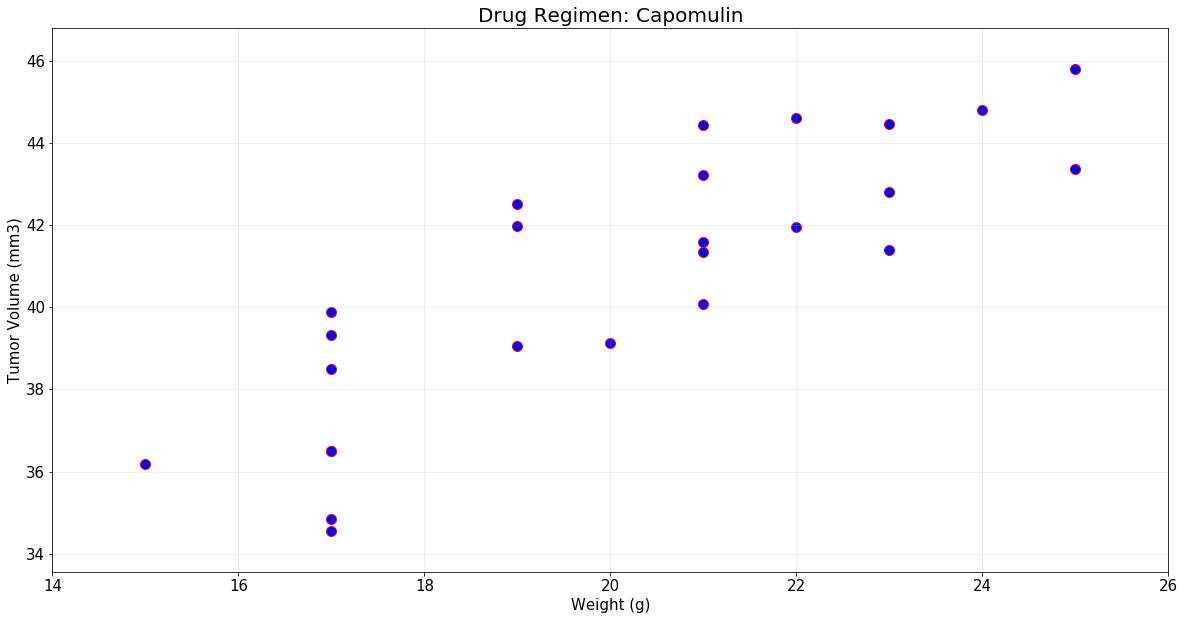

In [27]:
plt.figure(figsize=(20, 10))

plt.scatter(
    combinedMice_df["Weight (g)"],
    combinedMice_df["Tumor Volume (mm3)"],
    marker="o",
    facecolors="blue",
    edgecolors="red",
    s=100,
)

plt.title(f"Drug Regimen: {drugRegiment}", fontsize=20)

plt.ylabel("Tumor Volume (mm3)", fontsize=15)
plt.xlabel("Weight (g)", fontsize=15)

plt.ylim(
    combinedMice_df["Tumor Volume (mm3)"].min() - 1,
    combinedMice_df["Tumor Volume (mm3)"].max() + 1,
)
plt.xlim(
    combinedMice_df["Weight (g)"].min() - 1, combinedMice_df["Weight (g)"].max() + 1
)

plt.grid(alpha=0.25)

plt.show()

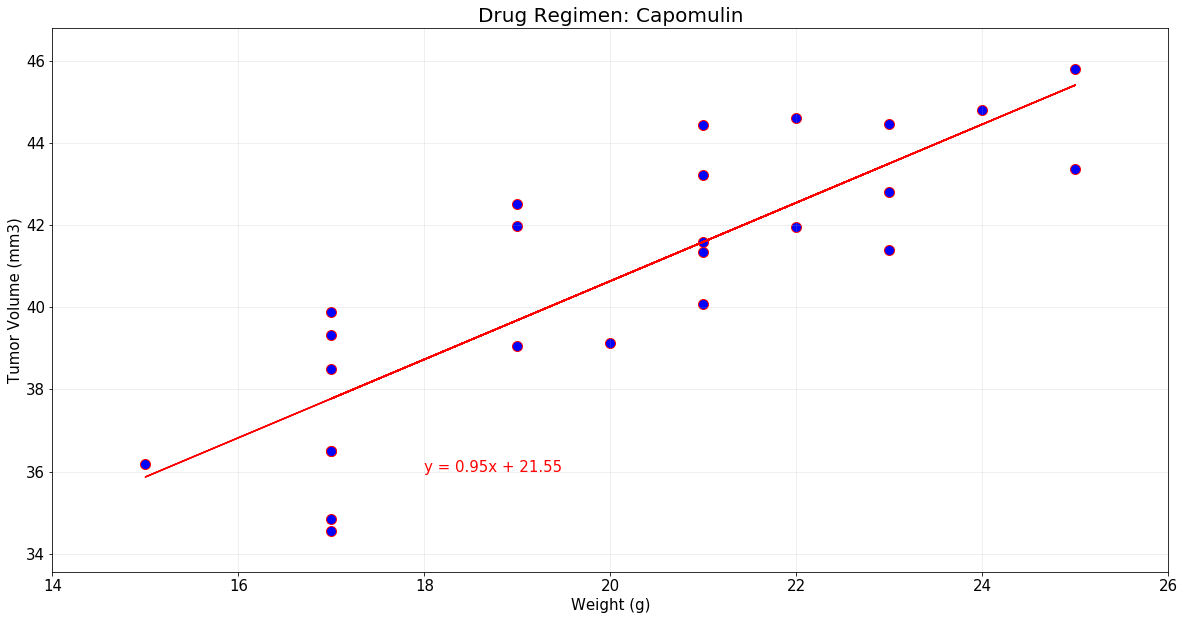

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

X_values = combinedMice_df["Weight (g)"]
Y_values = combinedMice_df["Tumor Volume (mm3)"]

# Linear regression formula.
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_values, Y_values)
regress_values = X_values * slope + intercept

# Line equation text
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.figure(figsize=(20, 10))

plt.scatter(
    combinedMice_df["Weight (g)"],
    combinedMice_df["Tumor Volume (mm3)"],
    marker="o",
    facecolors="blue",
    edgecolors="red",
    s=100,
)

# Line plot - by plotting points of x values long the regressvalues.
plt.plot(X_values, regress_values, "r-")

plt.title(f"Drug Regimen: {drugRegiment}", fontsize=20)

plt.ylabel("Tumor Volume (mm3)", fontsize=15)
plt.xlabel("Weight (g)", fontsize=15)

plt.ylim(
    combinedMice_df["Tumor Volume (mm3)"].min() - 1,
    combinedMice_df["Tumor Volume (mm3)"].max() + 1,
)
plt.xlim(
    combinedMice_df["Weight (g)"].min() - 1, combinedMice_df["Weight (g)"].max() + 1
)


plt.annotate(
    line_eq,  # String we created earlier with the equation.
    (18, 36),  # Location of the annotation.
    fontsize=15,
    color="red",
)

plt.grid(alpha=0.25)

plt.tight_layout
plt.show()

In [32]:
correlation = st.pearsonr(
    combinedMice_df["Weight (g)"], combinedMice_df["Tumor Volume (mm3)"]
)


print(
    f"The Correlation Coefficient between the weight and tumor volume is {correlation[0]:.2f} for the mice under the {drugRegiment} drug regime."
)

The Correlation Coefficient between the weight and tumor volume is 0.84 for the mice under the Capomulin drug regime.
